In [1]:
import lightgbm as lgb
from data_pipeline import data_transform_pipeline, cap_sales, data_transform_pipeline_2
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error
import re

data = pd.read_csv('data/train.csv')

train_data = data[data['date'] < '2017-08-01']
train_data = cap_sales(train_data)
test_data = data[data['date'] >= '2017-08-01']
test_data = cap_sales(test_data)

X_train = train_data
y_train = X_train.pop('sales')

X_test = test_data
y_test = X_test.pop('sales')

X_train = data_transform_pipeline.fit_transform(X_train)
X_test = data_transform_pipeline.transform(X_test)

X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = lgb.LGBMRegressor(force_row_wise=True)

c:\Users\tzbk\CODIGOS\python\machine_learning\time_series_ml_analysis\data_pipeline.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sales = df.sales.map(lambda x: x if x < 20000 else 20000)


In [4]:
model.fit(X_train, y_train)


prediction = model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, prediction)}")
print(f"ROOT of MSE: {mean_squared_error(y_test, prediction)**0.5}")

[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 2974158, number of used features: 40
[LightGBM] [Info] Start training from score 356.541586
MSE: 648933.3647907374
ROOT of MSE: 805.5640041553107


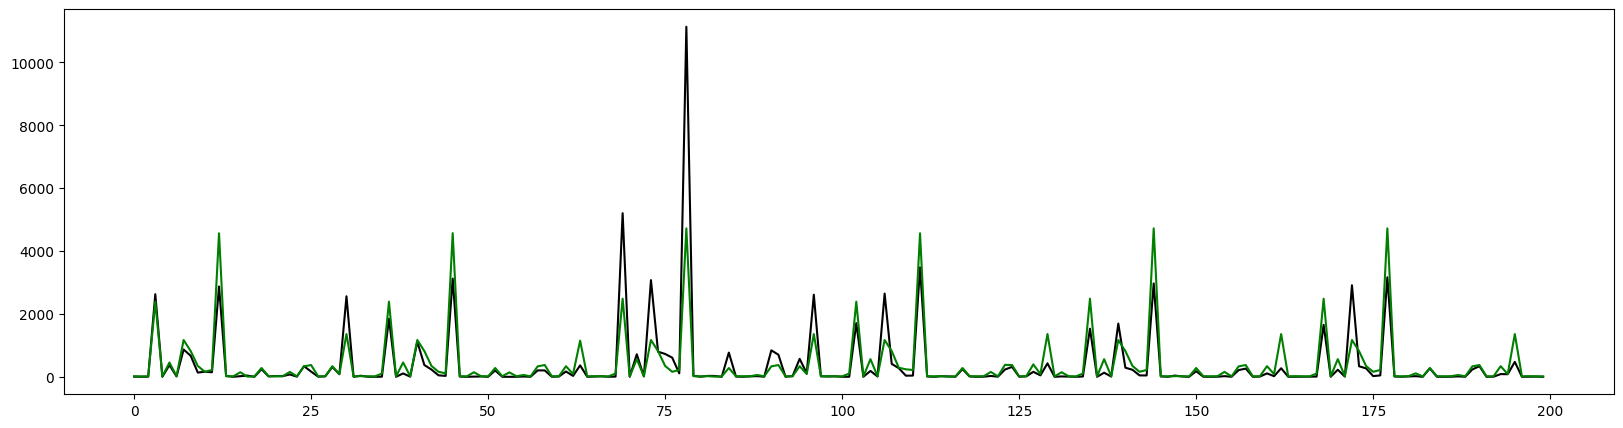

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.plot(pd.Series(X_test.index)[:200], y_test[:200],  color='black')
plt.plot(pd.Series(X_test.index)[:200], prediction[:200],  color='green')

In [6]:
prediction

array([  16.91734157,   10.78086971,   12.63236682, ..., 2024.31981249,
        427.15190609,   11.03315829])

Now training for competition

In [12]:
competition_model = lgb.LGBMRegressor(force_row_wise=True, colsample_bytree=0.5, learning_rate=0.05, num_leaves=20)
competition_model.fit(pd.concat([X_train, X_test]), pd.concat([y_train, y_test]))

[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 3000888, number of used features: 40
[LightGBM] [Info] Start training from score 357.508955
MSE: 648933.3647907374
ROOT of MSE: 805.5640041553107


In [13]:
X_competition = pd.read_csv('data/test.csv')
competition_indexes = X_competition['id']
X_competition = data_transform_pipeline.transform(X_competition)
X_competition = X_competition.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [14]:
competition_prediction = competition_model.predict(X_competition)

In [16]:
pd.DataFrame({'id':competition_indexes, 
              'sales':competition_prediction }).to_csv('data/submission_pipeline1.csv', index=False)

2nd Alternative

In [2]:
data = pd.read_csv('data/train.csv')

data = cap_sales(data)

X = data
y = X.pop('sales')

X_transformed = data_transform_pipeline_2.fit_transform(X)

X_transformed = X_transformed.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
model = lgb.LGBMRegressor(force_row_wise=True)

model.fit(X_transformed, y)


[LightGBM] [Info] Total Bins 594
[LightGBM] [Info] Number of data points in the train set: 3000888, number of used features: 40
[LightGBM] [Info] Start training from score 357.508955


LGBMRegressor(force_row_wise=True)

In [4]:
X_competition = pd.read_csv('data/test.csv')
competition_indexes = X_competition['id']
X_competition = data_transform_pipeline_2.transform(X_competition)
X_competition = X_competition.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
competition_prediction_2 = model.predict(X_competition)

pd.DataFrame({'id':competition_indexes, 
              'sales':competition_prediction_2 }).to_csv('data/submission_pipeline2.csv', index=False)